In [119]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [120]:
# Import necessary libraries
from sklearn import svm
from sklearn import datasets
# Load the Iris dataset
iris = datasets.load_iris()
# We only take the first two
# features for simplicity
X = iris.data[:, :2]
y = iris.target
# Fit the SVM model
model = svm.SVC(kernel='linear') #klasifikatorius čia!
model.fit(X, y)
# Predict using the SVM model
predictions = model.predict(X)
# Evaluate the predictions
accuracy = model.score(X, y)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.82


In [121]:
import os
print(os.getcwd())

c:\Users\pauli\Desktop\DataScienceNotebooks\Studentai\Paulius Vanagas


In [122]:
# You will find the following 4 files:
# b2b_gv_vartojimas.xlsx - B2B prosumers
# b2b_ngv_vartojimas.xlsx - B2B consumers
# b2c_gv_vartojimas.xlsx - B2C prosumers
# b2c_ngv_vartojimas.xlsx - B2C consumers
# The goal is to create the most accurate models to predict the next 
# day's (D-1) electricity consumption (24 values). You should create a 
# model that makes the forecast of each hour for the next day at 11:00 a.m. 
# of the current day, because that's how the market works - by 11:00 a.m. you 
# need to provide the Nordpool operator with the volumes of electricity (and prices, but it doesn't matter in this case) 
#                                                                        that you want to buy every hour the next day.

# An additional task is to create a classifier that allows to classify users as accurately as possible according
# to their electricity consumption data: 4 classes according to the names of the excel files.


In [123]:
df1 = pd.read_excel(r"C:\Users\pauli\Downloads\b2c_gv_vartojimas.xlsx")

In [152]:
df2 = pd.read_excel(r"C:\Users\pauli\Downloads\b2b_gv_vartojimas.xlsx")

In [190]:
df3 = pd.read_excel(r"C:\Users\pauli\Downloads\b2b_ngv_vartojimas.xlsx")

In [126]:
df4 = pd.read_excel(r"C:\Users\pauli\Downloads\b2c_ngv_vartojimas.xlsx")

In [127]:
df1.head()

,dateTime,0,1,2,3,4,5,6,7,8,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
0,2023-08-01 00:00:00,1.128,0.301,0.078,0.083,0.306,0.239,0.666,1.050,0.284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-08-01 01:00:00,1.465,0.262,0.095,0.090,0.303,0.214,0.696,0.467,0.263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-08-01 02:00:00,0.790,0.354,0.265,0.101,0.311,0.636,0.692,0.158,0.276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-08-01 03:00:00,0.726,0.319,0.099,0.106,0.310,0.145,0.669,0.081,0.256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-08-01 04:00:00,0.659,0.257,0.076,0.085,0.319,0.146,0.687,0.176,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
df2.head()

,data_valanda,0,1,2,3,4,5,6,7,8,...,753,754,755,756,757,758,759,760,761,762
0,2022-11-01 00:00:00,0.0,0.0,4.68,0.001,0.0,0.0,1.7159,1.9334,1.4671,...,5.0,0.4199,23.40,0.0,0.0,5.9883,91.9,0.3135,6.9318,2.8310
1,2022-11-01 01:00:00,0.0,0.0,4.34,0.001,0.0,0.0,1.0673,0.5732,1.1481,...,4.7,0.3783,22.44,0.0,0.0,5.2497,90.5,0.2949,5.3964,2.8309
2,2022-11-01 02:00:00,0.0,0.0,4.12,0.000,0.0,0.0,1.3911,1.1709,4.9880,...,4.7,0.3251,22.26,0.0,0.0,4.7670,94.7,0.1766,5.3742,2.8025
3,2022-11-01 03:00:00,0.0,0.0,4.16,0.002,0.0,0.0,1.4227,0.4989,1.2216,...,4.5,0.1573,21.84,0.0,0.0,4.1760,92.0,0.1443,5.5298,2.8072
4,2022-11-01 04:00:00,0.0,0.0,4.52,0.001,0.0,0.0,1.0054,0.5903,1.2296,...,4.5,0.1448,22.08,0.0,0.0,4.2792,89.4,0.1266,5.9279,2.8221


In [129]:
df3.head()

,data_valanda,0,1,2,3,4,5,6,7,8,...,789,790,791,792,793,794,795,796,797,798
0,2022-11-01 00:00:00,0.0,0,0.014,0.018,0.0,0.0,0.014,0.049,0.0,...,0.034,0.335,0.0,0.0,0.0,0.0,0.0,0.071,0.0,0.459
1,2022-11-01 01:00:00,0.0,0,0.013,0.018,0.0,0.0,0.013,0.048,0.0,...,0.033,0.335,0.0,0.0,0.0,0.0,0.0,0.039,0.0,0.437
2,2022-11-01 02:00:00,0.0,0,0.014,0.017,0.0,0.0,0.015,0.048,0.0,...,0.035,0.346,0.0,0.0,0.0,0.0,0.0,0.083,0.0,0.457
3,2022-11-01 03:00:00,0.0,0,0.013,0.018,0.0,0.0,0.014,0.048,0.0,...,0.035,0.340,0.0,0.0,0.0,0.0,0.0,0.079,0.0,0.418
4,2022-11-01 04:00:00,0.0,0,0.013,0.018,0.0,0.0,0.014,0.049,0.0,...,0.035,0.339,0.0,0.0,0.0,0.0,0.0,0.058,0.0,0.466


In [130]:
df4.head()

,dateTime,0,1,2,3,4,5,6,7,8,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
0,2023-08-01 00:00:00,0.117,0.103,0.041,0.070,0.126,0.048,0.131,0.171,0.347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-08-01 01:00:00,0.501,0.043,0.046,0.120,0.104,0.051,0.110,0.210,0.963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-08-01 02:00:00,0.185,0.052,0.046,0.145,0.066,0.047,0.110,0.195,0.574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-08-01 03:00:00,0.107,0.050,0.045,0.067,0.127,0.049,0.104,0.145,0.429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-08-01 04:00:00,0.118,0.037,0.041,0.124,0.198,0.046,0.179,0.185,0.397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
df1['viso'] = df1.iloc[:, 1:].sum(axis=1)
df1=df1[['dateTime', 'viso']].copy()
df1['valanda']=df1['dateTime'].dt.hour
df1['diena']=df1['dateTime'].dt.day
df1['menuo']=df1['dateTime'].dt.month
df1['sav_diena']=df1['dateTime'].dt.weekday

In [132]:
df1_1031=df1[-25:-1].copy()

In [133]:
df1=df1[:-25]

In [134]:
df1_1031.tail(5)

,dateTime,viso,valanda,diena,menuo,sav_diena
2179,2023-10-30 19:00:00,1152.997833,19,30,10,0
2180,2023-10-30 20:00:00,1137.366634,20,30,10,0
2181,2023-10-30 21:00:00,1094.216201,21,30,10,0
2182,2023-10-30 22:00:00,952.857967,22,30,10,0
2183,2023-10-30 23:00:00,811.025201,23,30,10,0


In [135]:
X= df1.drop(columns=['dateTime', 'viso'])
y=df1['viso']
x = df1_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [136]:
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

33.809045487310755

In [137]:
pred = fit.predict(x)

In [138]:
df1_1031['Linear'] = pred

In [139]:
df1_1031.head(30)

,dateTime,viso,valanda,diena,menuo,sav_diena,Linear
2160,2023-10-30 00:00:00,745.340335,0,30,10,0,598.489470
2161,2023-10-30 01:00:00,683.211501,1,30,10,0,611.332588
2162,2023-10-30 02:00:00,637.173832,2,30,10,0,624.175705
2163,2023-10-30 03:00:00,627.920467,3,30,10,0,637.018822
2164,2023-10-30 04:00:00,626.576100,4,30,10,0,649.861940
2165,2023-10-30 05:00:00,691.266433,5,30,10,0,662.705057
2166,2023-10-30 06:00:00,808.859468,6,30,10,0,675.548174
2167,2023-10-30 07:00:00,876.396266,7,30,10,0,688.391292
2168,2023-10-30 08:00:00,720.391066,8,30,10,0,701.234409
2169,2023-10-30 09:00:00,522.039667,9,30,10,0,714.077526


In [140]:
rf = RandomForestRegressor(n_estimators=70, random_state=35)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Percentage Error: 7.8356062928488095%


In [141]:
pred = rf.predict(x)

In [142]:
df1_1031['RandomForest']=pred

In [143]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Squared Error: 5655.1310045453765
Mean Absolute Percentage Error: 10.002760993175158%


In [144]:
pred = dt_regressor.predict(x)

In [145]:
df1_1031['DecisionTree']= pred

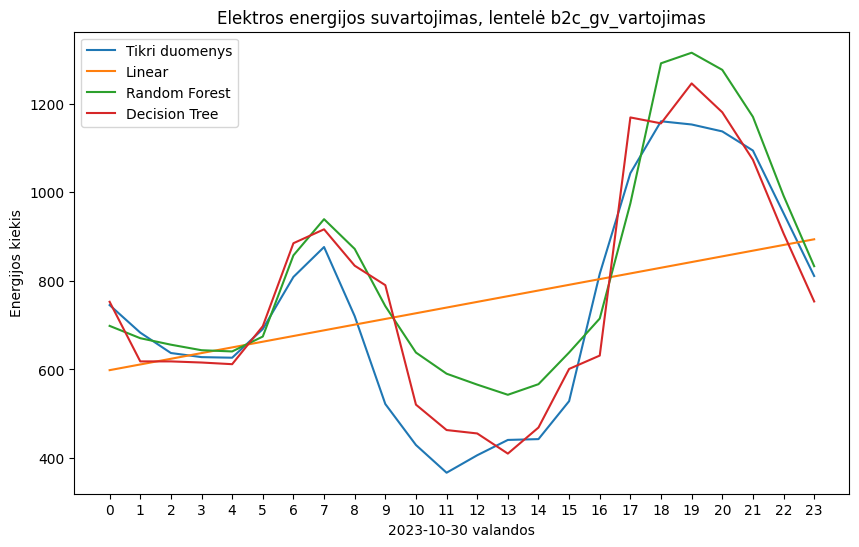

In [146]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df1_1031, x='valanda', y='viso', label='Tikri duomenys')
sns.lineplot(data=df1_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df1_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df1_1031, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, lentelė b2c_gv_vartojimas')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df1_1031['valanda'], labels=df1_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [153]:
df2['viso'] = df2.iloc[:, 1:].sum(axis=1)
df2=df2[['data_valanda', 'viso']].copy()
df2['valanda']=df2['data_valanda'].dt.hour
df2['diena']=df2['data_valanda'].dt.day
df2['menuo']=df2['data_valanda'].dt.month
df2['sav_diena']=df2['data_valanda'].dt.weekday

In [154]:
df2_1031=df2[-49:-25].copy()

In [155]:
df2=df2[:-49]

In [156]:
df2_1031.head()

,data_valanda,viso,valanda,diena,menuo,sav_diena
8711,2023-10-30 00:00:00,6894.730016,0,30,10,0
8712,2023-10-30 01:00:00,6871.828988,1,30,10,0
8713,2023-10-30 02:00:00,6868.991428,2,30,10,0
8714,2023-10-30 03:00:00,6758.376506,3,30,10,0
8715,2023-10-30 04:00:00,7032.918868,4,30,10,0


In [157]:
X= df2.drop(columns=['data_valanda', 'viso'])
y=df2['viso']
x = df2_1031.drop(columns=['data_valanda', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(x)
df2_1031['Linear'] = pred

In [161]:
rf = RandomForestRegressor(n_estimators=70, random_state=35)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(x)
df2_1031['RandomForest']=pred

Mean Absolute Percentage Error: 4.582575193864765%


In [164]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(x)
df2_1031['DecisionTree']= pred

Mean Squared Error: 758358.5154660558
Mean Absolute Percentage Error: 5.553803114172367%


In [167]:
df2_1031.head(30)

,data_valanda,viso,valanda,diena,menuo,sav_diena,Linear,RandomForest,DecisionTree
8711,2023-10-30 00:00:00,6894.730016,0,30,10,0,10622.271822,6905.422362,7239.676896
8712,2023-10-30 01:00:00,6871.828988,1,30,10,0,10656.027431,6863.972405,7239.676896
8713,2023-10-30 02:00:00,6868.991428,2,30,10,0,10689.783040,6961.007651,7239.676896
8714,2023-10-30 03:00:00,6758.376506,3,30,10,0,10723.538649,6972.634578,7209.193161
8715,2023-10-30 04:00:00,7032.918868,4,30,10,0,10757.294258,7109.201684,7219.596738
8716,2023-10-30 05:00:00,7939.782129,5,30,10,0,10791.049867,7486.645549,7998.938276
8717,2023-10-30 06:00:00,10662.621605,6,30,10,0,10824.805476,10780.657595,10972.337487
8718,2023-10-30 07:00:00,13644.566871,7,30,10,0,10858.561085,15347.549965,16248.446100
8719,2023-10-30 08:00:00,15574.605416,8,30,10,0,10892.316694,19269.097842,20167.431700
8720,2023-10-30 09:00:00,14059.200347,9,30,10,0,10926.072303,19451.492488,20167.431700


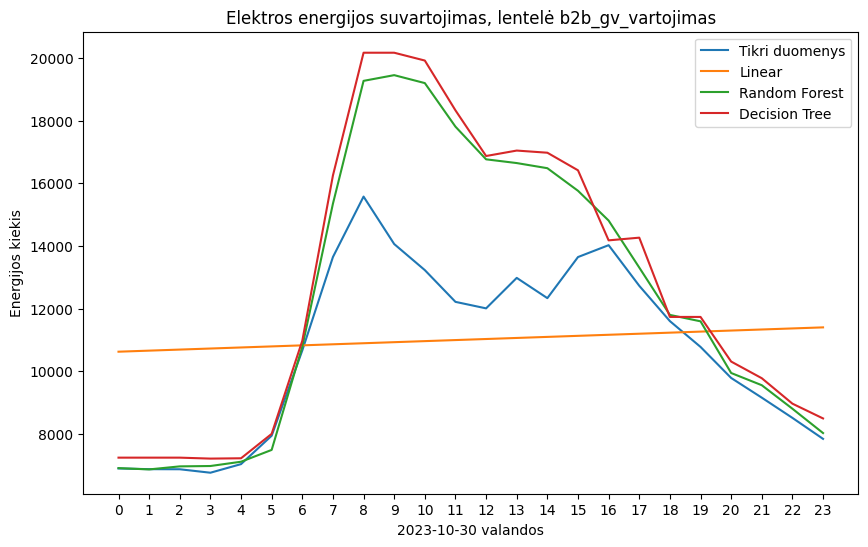

In [168]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df2_1031, x='valanda', y='viso', label='Tikri duomenys')
sns.lineplot(data=df2_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df2_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df2_1031, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, lentelė b2b_gv_vartojimas')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df2_1031['valanda'], labels=df2_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [191]:
df3['viso'] = df3.iloc[:, 1:].sum(axis=1)
df3=df3[['data_valanda', 'viso']].copy()
df3['valanda']=df3['data_valanda'].dt.hour
df3['diena']=df3['data_valanda'].dt.day
df3['menuo']=df3['data_valanda'].dt.month
df3['sav_diena']=df3['data_valanda'].dt.weekday
df3_1031=df3[-49:-25].copy()
df3=df3[:-49]

In [194]:
df3_1031.head()

,data_valanda,viso,valanda,diena,menuo,sav_diena
8711,2023-10-30 00:00:00,428.724936,0,30,10,0
8712,2023-10-30 01:00:00,412.581332,1,30,10,0
8713,2023-10-30 02:00:00,402.581666,2,30,10,0
8714,2023-10-30 03:00:00,394.806999,3,30,10,0
8715,2023-10-30 04:00:00,437.968999,4,30,10,0


In [195]:
X= df3.drop(columns=['data_valanda', 'viso'])
y=df3['viso']
x = df3_1031.drop(columns=['data_valanda', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(x)
df3_1031['Linear'] = pred

In [196]:
rf = RandomForestRegressor(n_estimators=70, random_state=35)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(x)
df3_1031['RandomForest']=pred

Mean Absolute Percentage Error: 3.685831844159361%


In [197]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(x)
df3_1031['DecisionTree']= pred

Mean Squared Error: 1683.6747895838807
Mean Absolute Percentage Error: 4.613277615041759%


In [198]:
df3_1031.head(30)

,data_valanda,viso,valanda,diena,menuo,sav_diena,Linear,RandomForest,DecisionTree
8711,2023-10-30 00:00:00,428.724936,0,30,10,0,594.388495,458.252252,488.445538
8712,2023-10-30 01:00:00,412.581332,1,30,10,0,601.945192,452.214970,472.934866
8713,2023-10-30 02:00:00,402.581666,2,30,10,0,609.501888,461.983308,462.763799
8714,2023-10-30 03:00:00,394.806999,3,30,10,0,617.058584,565.450559,863.683969
8715,2023-10-30 04:00:00,437.968999,4,30,10,0,624.615281,503.444426,453.380153
8716,2023-10-30 05:00:00,489.837000,5,30,10,0,632.171977,498.481285,499.562753
8717,2023-10-30 06:00:00,585.040665,6,30,10,0,639.728673,597.120706,622.444111
8718,2023-10-30 07:00:00,660.999999,7,30,10,0,647.285370,753.904323,714.320551
8719,2023-10-30 08:00:00,825.074667,8,30,10,0,654.842066,883.370043,840.605236
8720,2023-10-30 09:00:00,955.184667,9,30,10,0,662.398763,1003.565651,1011.181371


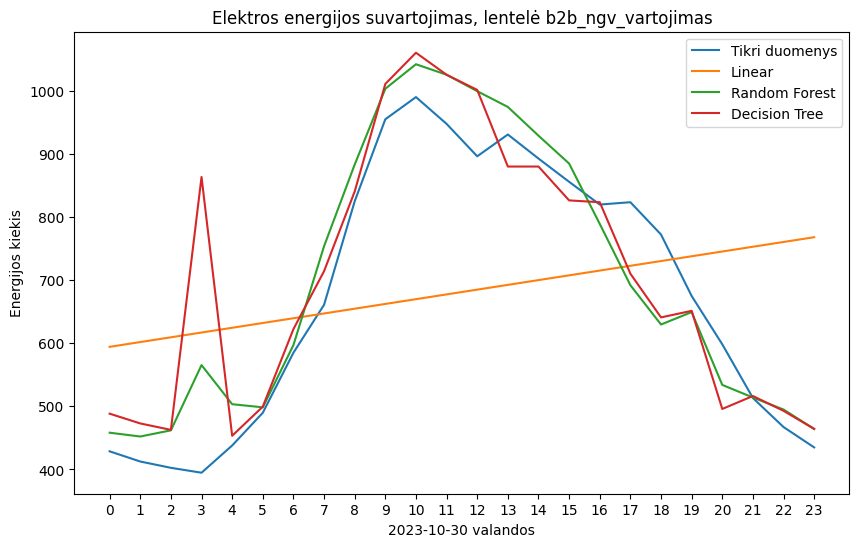

In [199]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df3_1031, x='valanda', y='viso', label='Tikri duomenys')
sns.lineplot(data=df3_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df3_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df3_1031, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, lentelė b2b_ngv_vartojimas')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df3_1031['valanda'], labels=df3_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [200]:
df4['viso'] = df4.iloc[:, 1:].sum(axis=1)
df4=df4[['dateTime', 'viso']].copy()
df4['valanda']=df4['dateTime'].dt.hour
df4['diena']=df4['dateTime'].dt.day
df4['menuo']=df4['dateTime'].dt.month
df4['sav_diena']=df4['dateTime'].dt.weekday
df4_1031=df4[-49:-25].copy()
df4=df4[:-49]

In [202]:
X= df4.drop(columns=['dateTime', 'viso'])
y=df4['viso']
x = df4_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(x)
df4_1031['Linear'] = pred

In [203]:
rf = RandomForestRegressor(n_estimators=70, random_state=35)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(x)
df4_1031['RandomForest']=pred

Mean Absolute Percentage Error: 3.439868608921114%


In [204]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(x)
df4_1031['DecisionTree']= pred

Mean Squared Error: 171.32591422445836
Mean Absolute Percentage Error: 4.693694781247449%


In [205]:
df4_1031.head(30)

,dateTime,viso,valanda,diena,menuo,sav_diena,Linear,RandomForest,DecisionTree
2136,2023-10-29 00:00:00,219.180333,0,29,10,6,181.436201,208.340814,213.661500
2137,2023-10-29 01:00:00,189.393002,1,29,10,6,188.548371,170.349017,175.727500
2138,2023-10-29 02:00:00,185.989334,2,29,10,6,195.660542,155.647993,152.914334
2139,2023-10-29 03:00:00,323.889001,3,29,10,6,202.772713,151.290655,147.586666
2140,2023-10-29 04:00:00,156.395666,4,29,10,6,209.884883,146.857753,140.481334
2141,2023-10-29 05:00:00,172.612334,5,29,10,6,216.997054,151.192786,144.840500
2142,2023-10-29 06:00:00,198.902999,6,29,10,6,224.109225,172.393803,164.056001
2143,2023-10-29 07:00:00,262.538000,7,29,10,6,231.221395,193.659496,183.727501
2144,2023-10-29 08:00:00,330.783668,8,29,10,6,238.333566,251.882407,243.995833
2145,2023-10-29 09:00:00,350.923000,9,29,10,6,245.445736,312.067676,281.308166


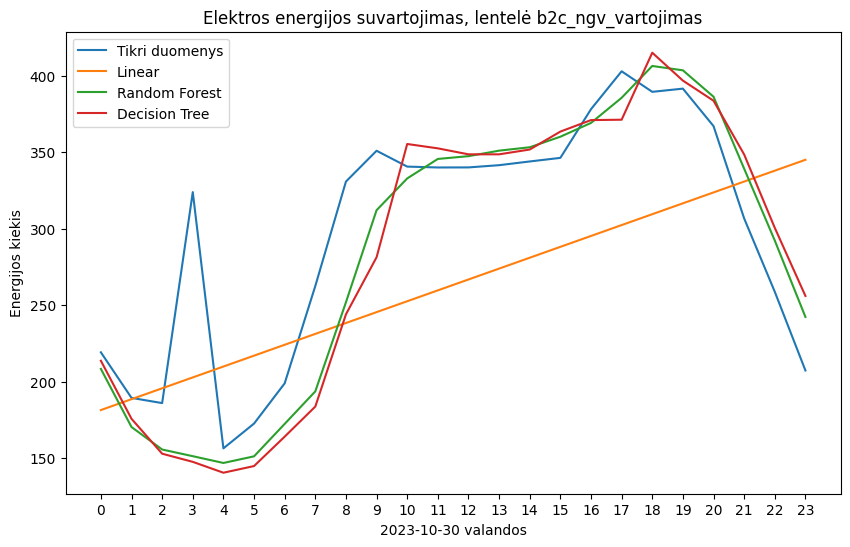

In [206]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df4_1031, x='valanda', y='viso', label='Tikri duomenys')
sns.lineplot(data=df4_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df4_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df4_1031, x='valanda', y='DecisionTree', label='Decision Tree')
plt.title('Elektros energijos suvartojimas, lentelė b2c_ngv_vartojimas')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df4_1031['valanda'], labels=df4_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()